In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
from mpl_toolkits.mplot3d import axes3d

import seaborn as sns
import matplotlib.patches as patches
import netCDF4

-0.9394555492158109
-0.9278882075101234


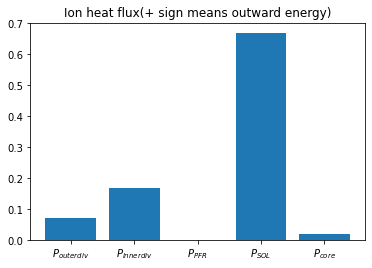

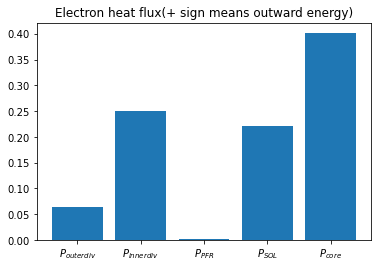

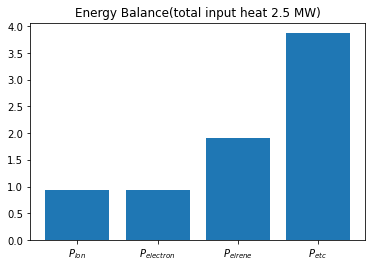

total internal energy "outward" =  7.653692811986812


In [77]:
def Global_internal_energy_balance(file_location):
    nc_balance = netCDF4.Dataset(file_location)
    fhi_32      = nc_balance['fhi_32'][:]
    fhi_52      = nc_balance['fhi_52'][:]
    fhi_cond    = nc_balance['fhi_cond'][:]
    fhi_dia     = nc_balance['fhi_dia'][:]
    fhi_ecrb    = nc_balance['fhi_ecrb'][:]
    fhi_strange = nc_balance['fhi_strange'][:]
    fhi_pschused= nc_balance['fhi_pschused'][:]
    fhi_inert   = nc_balance['fhi_inert'][:]
    fhi_vispar  = nc_balance['fhi_vispar'][:]
    fhi_visper  = nc_balance['fhi_visper'][:]
    fhi_visq    = nc_balance['fhi_visq'][:]
    fhi_anml    = nc_balance['fhi_anml'][:]
    fhi_kevis   = nc_balance['fhi_kevis'][:]

    fhe_32      = nc_balance['fhe_32'][:]
    fhe_52      = nc_balance['fhe_52'][:]
    fhe_thermj  = nc_balance['fhe_thermj'][:]
    fhe_cond    = nc_balance['fhe_cond'][:]
    fhe_dia     = nc_balance['fhe_dia'][:]
    fhe_ecrb    = nc_balance['fhe_ecrb'][:]
    fhe_strange = nc_balance['fhe_strange'][:]
    fhe_pschused= nc_balance['fhe_pschused'][:]
    #fhe_vispar  = nc_balance['fhe_vispar'][:]
    #fhe_visper  = nc_balance['fhe_visper'][:]
    #fhe_visq    = nc_balance['fhe_visq'][:]
    #fhe_anml    = nc_balance['fhe_anml'][:]
    #fhe_kevis   = nc_balance['fhe_kevis'][:]

    total_fhi =fhi_32+fhi_52+fhi_cond+fhi_dia+fhi_ecrb+fhi_strange+fhi_pschused+fhi_inert+fhi_vispar+fhi_visper+fhi_visq+fhi_anml+fhi_kevis
    total_fhe =fhe_32+fhe_52+fhe_cond+fhe_dia+fhe_ecrb+fhe_strange+fhe_pschused+fhe_thermj

    eirene_mc_eael_she_bal = nc_balance['eirene_mc_eael_she_bal'][:]
    eirene_mc_emel_she_bal = nc_balance['eirene_mc_emel_she_bal'][:]
    eirene_mc_eiel_she_bal = nc_balance['eirene_mc_eiel_she_bal'][:]
    eirene_mc_epel_she_bal = nc_balance['eirene_mc_epel_she_bal'][:]

    eirene_mc_eapl_shi_bal = nc_balance['eirene_mc_eapl_shi_bal'][:]
    eirene_mc_empl_shi_bal = nc_balance['eirene_mc_empl_shi_bal'][:]
    eirene_mc_eipl_shi_bal = nc_balance['eirene_mc_eipl_shi_bal'][:]
    eirene_mc_eppl_shi_bal = nc_balance['eirene_mc_eppl_shi_bal'][:]







    def heat_flux(valname):
        total_heat_loc = 1000000
        fht_local = valname

        heat_outer_diver = np.sum((fht_local[1,1:,96]))/total_heat_loc+np.sum((fht_local[0,1:,96]))/total_heat_loc

        heat_inner_diver = np.sum((fht_local[1,1:,1]))/total_heat_loc+np.sum((fht_local[0,1:,1]))/total_heat_loc

        heat_PRF = (np.sum((fht_local[1,1,77:]))+np.sum((fht_local[1,1,:11])))/total_heat_loc

        sol_heat = (np.sum(fht_local[0,37,:])+np.sum(fht_local[1,37,:]))/total_heat_loc

        core_heat = (np.sum((fht_local[0,0,11:77]))+np.sum((fht_local[1,0,11:77])))/total_heat_loc

        return -heat_outer_diver,heat_inner_diver,heat_PRF,-sol_heat,core_heat


    def eirene_sum():
        sum_eirene_mc_eael_she_bal = np.sum(eirene_mc_eael_she_bal)
        sum_eirene_mc_emel_she_bal = np.sum(eirene_mc_emel_she_bal)
        sum_eirene_mc_eiel_she_bal = np.sum(eirene_mc_eiel_she_bal)
        sum_eirene_mc_epel_she_bal = np.sum(eirene_mc_epel_she_bal)

        sum_eirene_mc_eapl_shi_bal = np.sum(eirene_mc_eapl_shi_bal)
        sum_eirene_mc_empl_shi_bal = np.sum(eirene_mc_empl_shi_bal)
        sum_eirene_mc_eipl_shi_bal = np.sum(eirene_mc_eipl_shi_bal)
        sum_eirene_mc_eppl_shi_bal = np.sum(eirene_mc_eppl_shi_bal)

        return (sum_eirene_mc_eael_she_bal+sum_eirene_mc_emel_she_bal+sum_eirene_mc_eiel_she_bal+sum_eirene_mc_epel_she_bal +sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal)/1000000

    def other_source():
        heat_source= np.sum(nc_balance['b2srst_shi_bal'][:])+np.sum(nc_balance['b2srst_she_bal'][:])
        stel_terms = np.sum(nc_balance['b2stel_shi_ion_bal'][:])+np.sum(nc_balance['b2stel_she_bal'][:])

#        stel_terms = np.sum(nc_balance['b2stel_she_bal'][:])+np.sum(nc_balance['b2stel_she_ion_bal'][:])+np.sum(nc_balance['b2stel_she_rec_bal'][:])+np.sum(nc_balance['b2stel_shi_ion_bal'][:])+np.sum(nc_balance['b2stel_shi_rec_bal'][:]) 
#        stel_impurities = nc_balance['b2stel_she_bal'][:]
#        stel_impurities_sum = np.sum(stel_impurities[2:,:,:])
        joule = np.sum(nc_balance['b2sihs_joule_bal'][:])

        fraa  = np.sum(nc_balance['b2sihs_fraa_bal'][:])

        div   = np.sum(nc_balance['b2sihs_divue_bal'][:])#+ np.sum(nc_balance['b2sihs_divua_bal'][:])

        visa  = np.sum(nc_balance['b2sihs_visa_bal'][:])
        
        return (heat_source+stel_terms+joule+fraa+div+visa)/1000000

    print(sum(heat_flux(total_fhe)))
    print(sum(heat_flux(total_fhi)))
    plt.title("Ion heat flux(+ sign means outward energy)")
    x = [r'$P_{outer div}$',r'$P_{inner div}$',r'$P_{PFR}$',r'$P_{SOL}$',r'$P_{core}$']
    plt.bar(x,heat_flux(-total_fhi))
    plt.axhline(color = 'black',linewidth = 0.5)
    plt.show()

    plt.title("Electron heat flux(+ sign means outward energy)")
    x = [r'$P_{outer div}$',r'$P_{inner div}$',r'$P_{PFR}$',r'$P_{SOL}$',r'$P_{core}$']
    plt.bar(x,heat_flux(-total_fhe))
    plt.axhline(color = 'black',linewidth = 0.5)
    plt.show()

    plt.title("Energy Balance(total input heat 2.5 MW)")
    x = [r'$P_{ion}$',r'$P_{electron}$',r'$P_{eirene}$',r'$P_{etc}$']
    y = [-sum(heat_flux(total_fhi)),-sum(heat_flux(total_fhe)),-eirene_sum(),-other_source()]
    plt.bar(x,y)
    plt.axhline(color = 'black',linewidth = 0.5)


    plt.show()
    return print('total internal energy "outward" = ',-(sum(heat_flux(total_fhe))+sum(heat_flux(total_fhi))+eirene_sum()+other_source()))
Global_internal_energy_balance("./balance_algeo_7MW.nc")

-0.3679300578150172
0.5528817046677641


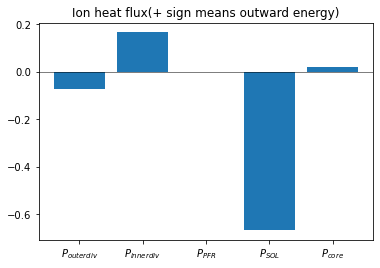

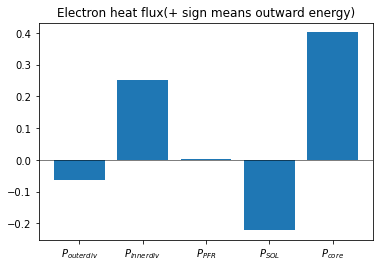

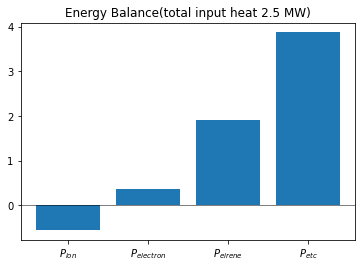

total internal energy "outward" =  5.601397408408131


In [48]:
(2.5-2.34)/2.5


0.06400000000000006

In [65]:
def find_fhi(file_location):
    nc_balance = netCDF4.Dataset(file_location)
    fhi_32      = nc_balance['fhi_32'][:]
    fhi_52      = nc_balance['fhi_52'][:]
    fhi_cond    = nc_balance['fhi_cond'][:]
    fhi_dia     = nc_balance['fhi_dia'][:]
    fhi_ecrb    = nc_balance['fhi_ecrb'][:]
    fhi_strange = nc_balance['fhi_strange'][:]
    fhi_pschused= nc_balance['fhi_pschused'][:]
    fhi_inert   = nc_balance['fhi_inert'][:]
    fhi_vispar  = nc_balance['fhi_vispar'][:]
    fhi_visper  = nc_balance['fhi_visper'][:]
    fhi_visq    = nc_balance['fhi_visq'][:]
    fhi_anml    = nc_balance['fhi_anml'][:]
    fhi_kevis   = nc_balance['fhi_kevis'][:]

    fhe_32      = nc_balance['fhe_32'][:]
    fhe_52      = nc_balance['fhe_52'][:]
    fhe_thermj  = nc_balance['fhe_thermj'][:]
    fhe_cond    = nc_balance['fhe_cond'][:]
    fhe_dia     = nc_balance['fhe_dia'][:]
    fhe_ecrb    = nc_balance['fhe_ecrb'][:]
    fhe_strange = nc_balance['fhe_strange'][:]
    fhe_pschused= nc_balance['fhe_pschused'][:]
    
    total_fhi =fhi_32+fhi_52+fhi_cond+fhi_dia+fhi_ecrb+fhi_strange+fhi_pschused+fhi_inert+fhi_vispar+fhi_visper+fhi_visq+fhi_anml+fhi_kevis
    total_fhe =fhe_32+fhe_52+fhe_cond+fhe_dia+fhe_ecrb+fhe_strange+fhe_pschused+fhe_thermj
    return total_fhi

In [66]:
nc_balance1 = netCDF4.Dataset("./balance_convgeo.nc")
balance_fhi = find_fhi("./balance_convgeo.nc")


b2fstate_fhi = np.load("./../fhi_b2fplasmf_co_KSTAR_noNe.npy")
print(balance_fhi-b2fstate_fhi)

[[[ 0.00000000e+00 -4.80908923e-05 -4.36564761e-05 ... -8.35370224e-06
    1.73621765e-04 -7.48093482e-05]
  [ 0.00000000e+00 -5.40332628e-02 -4.70183988e-02 ...  1.24439717e-01
    1.17391794e-01 -5.62392593e-02]
  [ 0.00000000e+00  1.41618130e-01  2.85792585e-02 ...  2.58421356e-01
    3.79329276e-02 -9.69827914e-02]
  ...
  [ 0.00000000e+00 -4.67580961e+01 -3.91599937e+01 ...  1.95570520e-01
   -2.65384277e-01  8.05333013e-01]
  [ 0.00000000e+00  3.85291046e+01  8.87309657e+00 ... -2.52241664e-01
    1.45213075e-01 -1.82636884e+00]
  [ 0.00000000e+00 -2.13776215e-03 -2.04810984e-02 ... -8.21080849e-05
    2.32113213e-03 -1.67652240e-03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.51620803e-05 -4.50398846e-03 -1.41007882e-02 ...  2.43631905e-02
    1.56233225e-02  1.65873980e-04]
  [ 2.42769197e-04  3.26759265e-02  3.36851707e-02 ...  1.67760211e-02
    2.84022307e-02 -8.73936507e-05]
  ...
  [-4.25447940e-04  1.6

ValueError: too many values to unpack (expected 2)

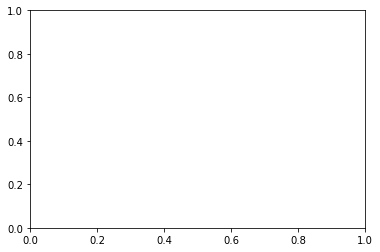

In [ ]:
Global_internal_energy_balance("./balance_nm_al_7MW.nc")